<a href="https://colab.research.google.com/github/claredavies/DataScienceCoursework/blob/master/DataScience3Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import os
import tweepy as tw
import pandas as pd
import sys 
import tweepy
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from tweepy import Stream
import time
import datetime

# Authenticate to Twitter
auth = tw.OAuthHandler("iy5oGHP6q1b6Zg14XpVnGct9z", 
    "Y3iHHViLz7XVWw0sSjiHaRWGZVeSnSmjugmtT8BwJw0R0ZK9X7")
auth.set_access_token("1450047668554698752-ogdyTTSKpSEwBMOVR2Teuu7uohrp6z", 
    "trIEAFunzkj70ILmhaJ8jFgoIOQvF1rIy9zDUJb325TGm")

api = tw.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [76]:
# The search term you want to find
query = "#anxiety -filter:retweets"

until_date = datetime.datetime.now().date()
d = datetime.timedelta(days = 7)
since_date = until_date - d

# usually fetches 5757
print(until_date)
print(since_date)
# since_date = '2021-10-13'
# until_date = '2021-10-20'

tweets = tw.Cursor(api.search,q=query,count = 100,lang="en",since=since_date, until=until_date, tweet_mode='extended').items()

# store the API responses in a list
tweets_copy = []

for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

2021-10-20
2021-10-13
Total Tweets fetched: 5757


In [78]:
from datetime import date
import calendar
# intialize the dataframe
tweets_df = pd.DataFrame()

my_date = date.today()
calendar.day_name[tweet.created_at.weekday()]
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
            # for text need to call api again with tweet id
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'day': calendar.day_name[tweet.created_at.weekday()],
                                               'hour': tweet.created_at.hour,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head(50)

,user_name,user_location,user_description,day,hour,text,hashtags,source
0,Evan Kirste at #HLTH2021,#RemoteWork #Boston,Need to scale your reach & engagement on #soci...,Tuesday,23,The Power of Music #mentalhealth #MentalHealth...,"[mentalhealth, MentalHealthMatters, anxiety, A...",Twitter for iPhone
1,iHire,"Frederick, MD & Angola, IN",Looking for a job? We continuously post the la...,Tuesday,23,New Job Opening: Licensed Therapist (#Scottsda...,"[Scottsdale, job, BehavioralTherapy, Behaviora...",Employer Tweet Updates
2,Online Mindfulness Therapy,"Boulder CO, USA",Peter Strong - Psychotherapist specializing in...,Tuesday,23,Online Therapy for Panic Attacks https://t.co/...,"[anxiety, anxietytreatment, anxietytherapy, an...",Buffer
3,blckborne,"London, England",Will U Be My Echo?,Tuesday,23,Today I turned 23 and I found 1 white hair on ...,"[anxiety, CancelStudentDebt, ADHD]",Twitter for Android
4,iHire,"Frederick, MD & Angola, IN",Looking for a job? We continuously post the la...,Tuesday,23,"New Opportunity: Licensed Therapist (#Tempe, A...","[Tempe, job, BehavioralTherapy, BehavioralHeal...",Employer Tweet Updates
5,Jaycee_cos,,I'm just here...\n\nhttps://t.co/PJnek6R9L6,Tuesday,23,And this is why I don't make relatable content...,"[exrelationship, anxiety, MentalHealthMatters,...",Twitter for Android
6,Karina,"Brisbane, Queensland","Wife, Mum, part-time PhD student (Blockchain),...",Tuesday,23,I have anxiety. This is triggered when I have ...,"[dv, trauma, anxiety]",Twitter for iPhone
7,Magdalena Kaczmarczyk,"Tienen, België","T-shirts by Magdalena Kaczmarczyk. Exclusive, ...",Tuesday,23,I am feeling fucking lonely #intags #loneline...,"[intags, loneliness, looser, naive, to, failur...",Twitter for Android
8,On the Borderline between Emotional 😭 & Stable 😊,Check out my Website 🌻😊👇🏻,The 💯% honest views of a Guy from the UK 🇬🇧 wh...,Tuesday,23,Thank you so much to My Star Wars Life who is ...,"[BPD, EUPD, OCD, Anxiety, Depression, MentalHe...",IFTTT
9,CareersInGovernment,"Los Angeles, CA",The nation's largest State and Local Governmen...,Tuesday,23,Accepting That You'll Never Finish Your To-Do ...,"[list, accepting, anxiety]",drumup.io


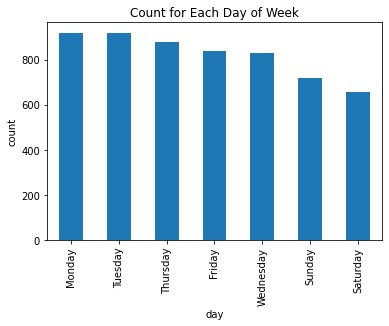

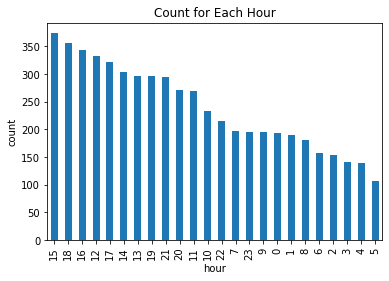

<Figure size 432x288 with 0 Axes>

In [79]:
import matplotlib.pyplot as plt
import numpy as np

tweet_day_plot = tweets_df['day'].value_counts(sort=True).plot.bar()
plt.xlabel('day')
plt.ylabel('count')
plt.title('Count for Each Day of Week')
plt.show()
plt.clf()

tweet_hour_plot = tweets_df['hour'].value_counts(sort=True).plot.bar()
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Count for Each Hour')
plt.show()
plt.clf()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[('I', 14793), ('racehorse', 9716), ('#anxiety', 5501), ('depression', 4871), ('fear', 4870), ('thought', 4868), ('days', 4868), ('ever', 4866), ('come', 4860), ('months', 4860), ('🐴🐴🐴Will', 4858), ('again....I', 4858), ('not...for', 4858), ('way.....no', 4858), ('wash...or', 4858), ('dress', 4858), ('think...as', 4858), ('merge', 4858), ('months....and', 4858), ('years....and', 4858), ('distant', 4858), ('memories', 4858), ('was...#depression', 4858), ('#mentalhealth', 198), ('#depression', 187), ('#Anxiety', 180), ('&amp;', 133), ('anxiety', 90), ('help', 88), ('via', 67), ('Online', 66), ('-', 66), ('#stress', 60), ('The', 53), ('Skype', 51), ('#health', 48), ('people', 47), ('See:', 47), ('mental', 45), ('You', 41), ('need', 39), ('#mentalhealthawareness', 39), ('.', 39), ('#MentalHealth', 38), ('Therapy', 37), ('Anxiety', 36), ('#onlinetherapy', 36), ('#selfcare',

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128052 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128052 missing from current font.
  font.set_text(s, 0, flags=flags)


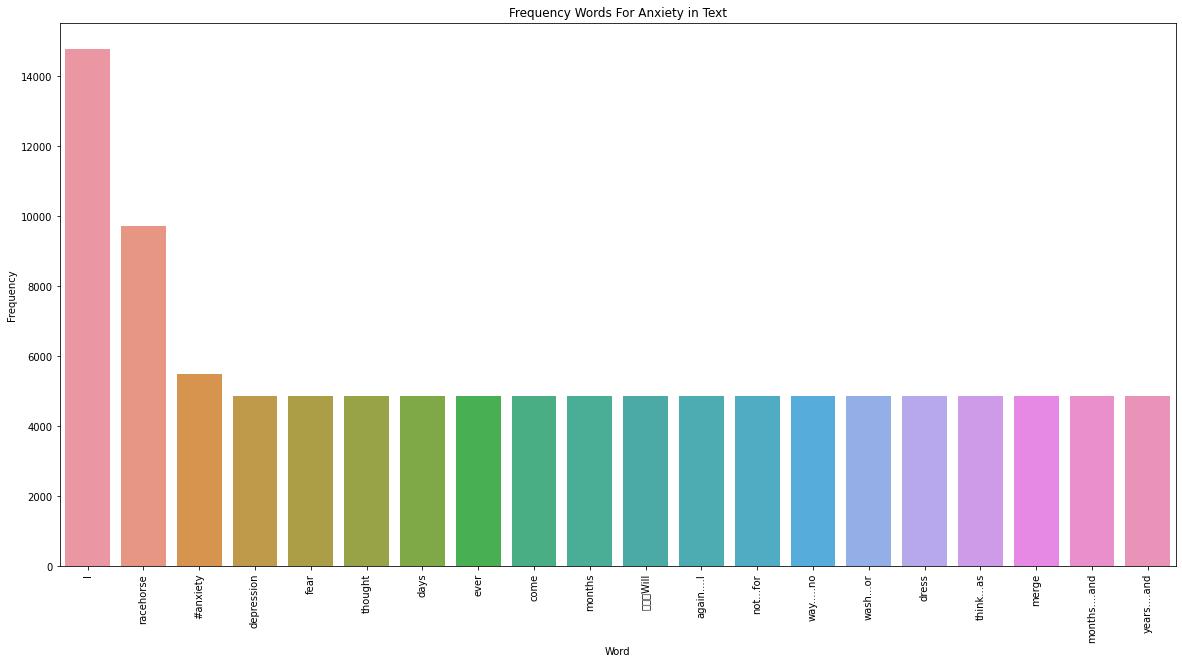

In [88]:
# plot common in user descriptions
# plot common in hashtags
# plot common in text
from collections import Counter
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
tweets_df['text'] = tweets_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
most_common_words_text = Counter(" ".join(tweets_df['text']).split()).most_common(20)

print(most_common_words)

# Put topic info into Panda
df_words_text = pd.DataFrame.from_records(most_common_words_text, columns=['Word','Frequency'])

sns.barplot(x='Word',y='Frequency',data=df_words_text).set_title("Frequency Words For Anxiety in Text")
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)
# plt.show()
